# Laptop Price Predictor | Machine Learning Project


### Overview:
#### The Laptop Price Predictor is an advanced Machine Learning project designed to predict the prices of laptops based on various features and specifications. This project aims to assist buyers, sellers, and manufacturers in estimating the appropriate price range for different laptops, making the purchasing process more informed and efficient. By leveraging the power of Machine Learning algorithms, the Laptop Price Predictor offers accurate and reliable price predictions, considering the complex relationships between laptops' attributes and their market values.

### Project Objectives:

#### Predictive Accuracy: Develop a robust Machine Learning model that can accurately predict laptop prices based on various input features such as processor type, RAM, storage capacity, graphics card, display size, brand, and other relevant parameters.

#### Feature Selection: Identify the most influential features that significantly impact laptop prices and utilize them to create an efficient prediction model.

#### Data Collection and Preprocessing: Gather a large dataset of laptops from various sources, including e-commerce websites, manufacturer catalogs, and user reviews. Clean and preprocess the data to ensure its quality and relevance for training the predictive model.

#### Model Selection and Optimization: Explore different Machine Learning algorithms such as Regression, Random Forest, Gradient Boosting, or Neural Networks, and select the most suitable model for price prediction. Optimize the model's hyperparameters to enhance its performance.

#### User-Friendly Interface: Develop an intuitive and user-friendly interface where users can input laptop specifications and receive accurate price predictions in real-time.

### Project Methodology:
#### The Laptop Price Predictor project follows a structured approach, comprising several key steps:

#### Data Collection: Gather laptop data from reputable sources, including online retailers, manufacturers, and public datasets. The data should include specifications like CPU, RAM, storage, GPU, display size, brand, user ratings, and prices.

#### Data Preprocessing: Clean the dataset to handle missing values, remove duplicates, and address outliers. Perform feature engineering to extract valuable information from the raw data and prepare it for modeling.

#### Feature Selection: Analyze the dataset to identify the most relevant features that significantly affect laptop prices. Features with low importance will be excluded to simplify the model.

#### Model Training: Split the dataset into training and testing sets. Utilize various Machine Learning algorithms to train the prediction model on the training data. Compare the performance of different models using evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

#### Model Evaluation: Assess the trained models' performance on the testing data to ensure their predictive accuracy and generalizability. Fine-tune the model parameters to improve its effectiveness.

#### Interface Development: Build a user-friendly interface that allows users to input laptop specifications easily and receive predicted prices based on the trained model.

### Expected Outcomes:

#### The Laptop Price Predictor project aims to achieve the following outcomes:

#### Accurate Price Predictions: The developed model should provide reliable and precise laptop price predictions, enabling users to make well-informed decisions during laptop purchases or sales.

#### Enhanced User Experience: The user interface should be intuitive, responsive, and accessible to users of all technical backgrounds.

#### Real-world Applicability: The project's outcome should have practical applications in e-commerce, retail, and the laptop manufacturing industry, assisting in price setting and market analysis.

#### In conclusion, the Laptop Price Predictor is an ambitious Machine Learning project with the goal of delivering accurate and efficient laptop price predictions. By leveraging the power of data and advanced algorithms, this project will provide valuable insights into laptop pricing trends, benefiting both consumers and industry stakeholders alike.

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [425]:
df = pd.read_csv('laptop_data.csv')

In [426]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [427]:
df.shape

(1303, 12)

#### The problem with the dataset is that there are very low datas

#### Some contains more than one pice of information so need to do feature engineering

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [429]:
df.duplicated().sum()

0

In [430]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [431]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [432]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Now we will remove GB from Ram and Kg from the weight columns and change their type

In [433]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [434]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [435]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [436]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [437]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


#### Now let us do eda analysis to know more about the data

In [439]:
import seaborn as sns

C:\Users\karki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

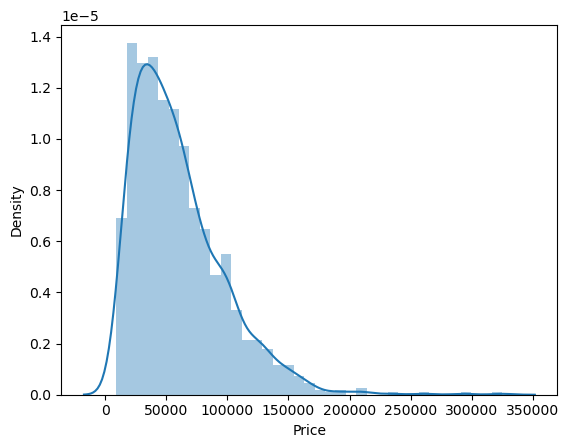

In [440]:
sns.distplot(df['Price'])

#### This shows that there are many laptops whose price are low and very less lsptop whose price is higher

In [441]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038733,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


#### The datas are skewed so there may be problem for some algoriths to coverge

#### Now let see which company has how many laptops in our dataset

<AxesSubplot:>

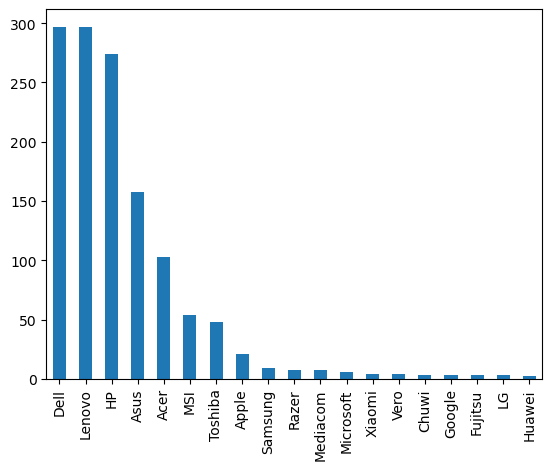

In [442]:
df['Company'].value_counts().plot(kind = 'bar')

#### Let us find our the average price for each of the company laptop

<AxesSubplot:xlabel='Company', ylabel='Price'>

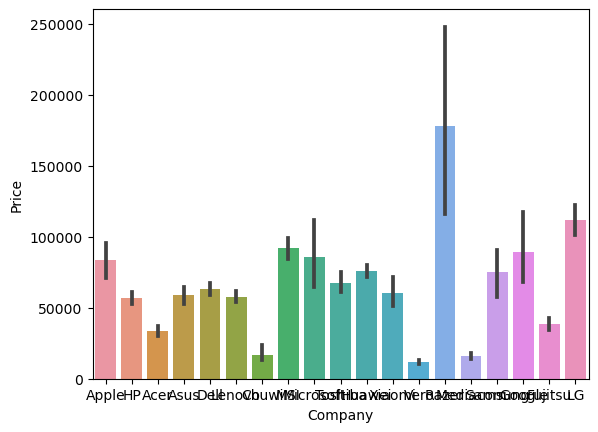

In [443]:
sns.barplot(x = df['Company'], y = df['Price'])

#### We are not able to see the name of the company so let's make company name vertical

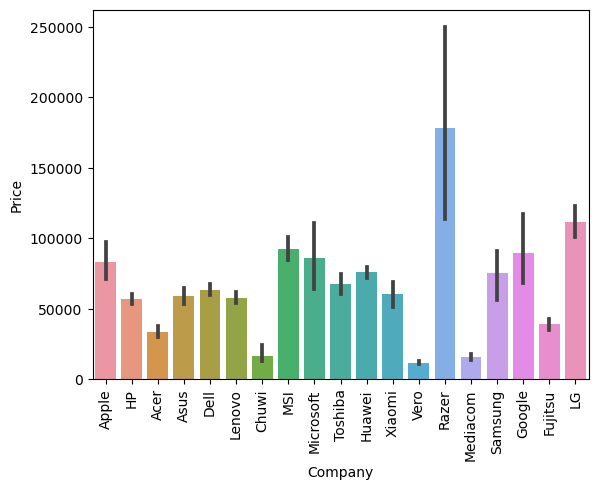

In [444]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### This shows that price of laptop depends on the company 

<AxesSubplot:>

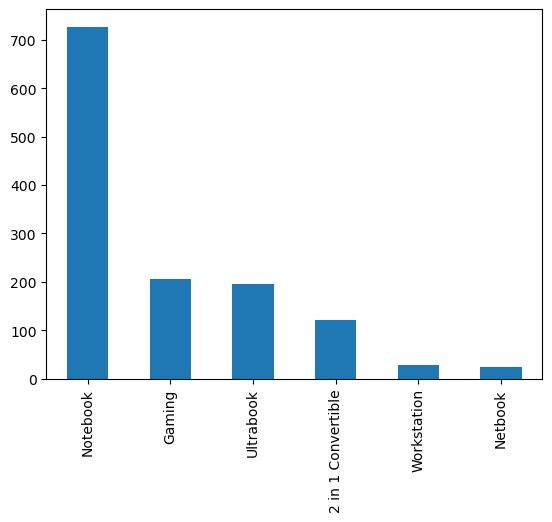

In [445]:
df['TypeName'].value_counts().plot(kind = 'bar')

#### Let us find the average price range for each type of laptop

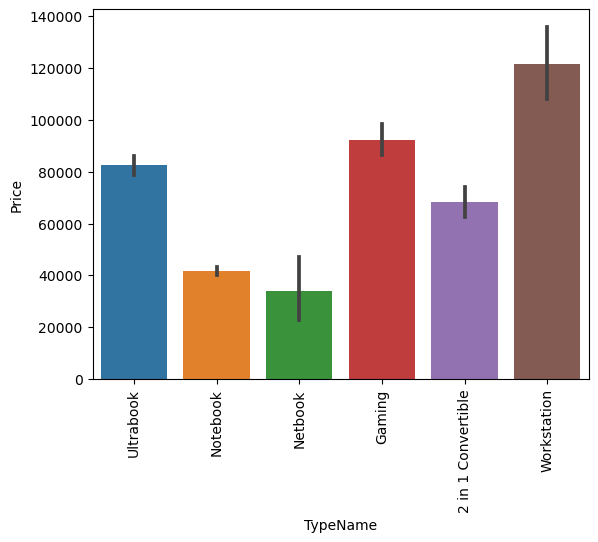

In [446]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### This shows that price depends on the type of laptop

C:\Users\karki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

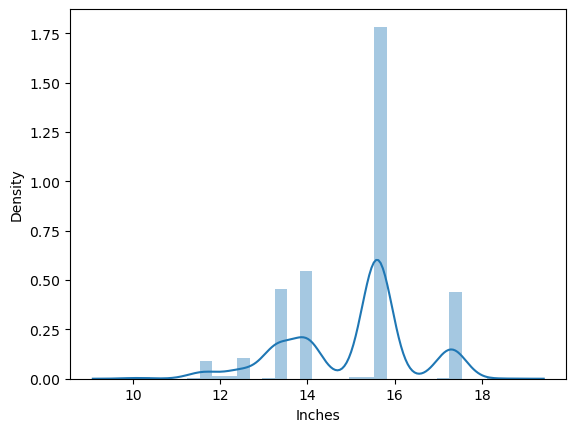

In [447]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

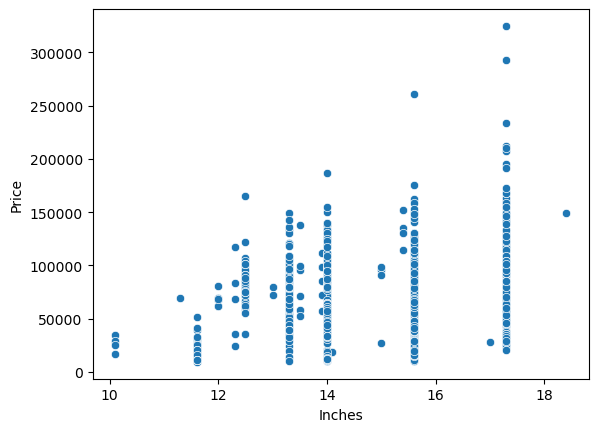

In [448]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

#### This shows that price depends abit on the inches too

#### Let us move to the screen resolution column. This will be difficult for us as there are alot of information there and every columns have differently presented the information

In [449]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

#### The only common in all is resolution so we will extract them. The another available we have is,is there touch screen or not and is it ips screen or not

In [450]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [451]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [452]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
512,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,44542.080,0
479,Toshiba,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,89084.160,0
200,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,98301.600,0
658,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,63722.880,0
547,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.008,0


<AxesSubplot:>

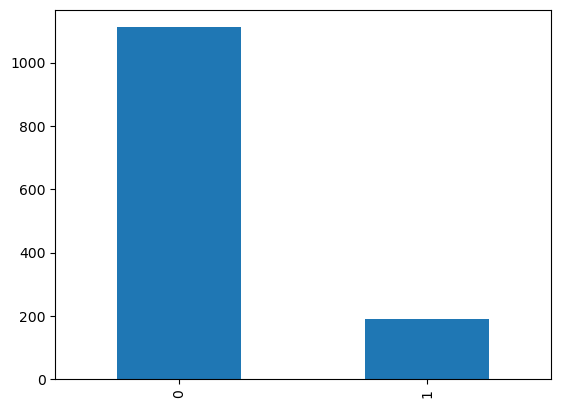

In [453]:
df['TouchScreen'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

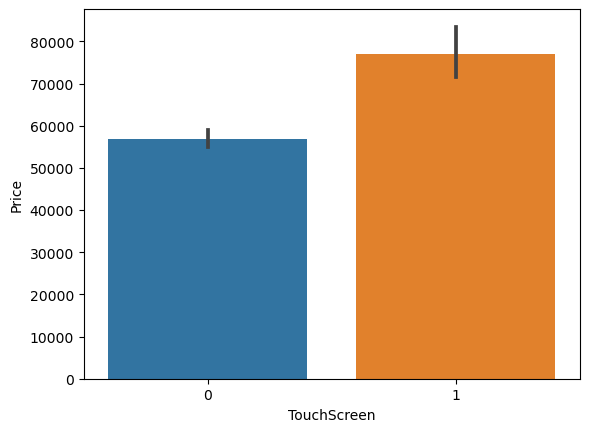

In [454]:
sns.barplot(x = df['TouchScreen'], y = df['Price'])

#### This shows that the touch screen laptops are expensive incomparison to the non touch screen

In [455]:
df['Ips'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [456]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
1173,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,21205.44,0,0
532,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210.72,0,1
54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,20459.52,0,0
966,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,43956.00,0,0
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.64,0,0


<AxesSubplot:>

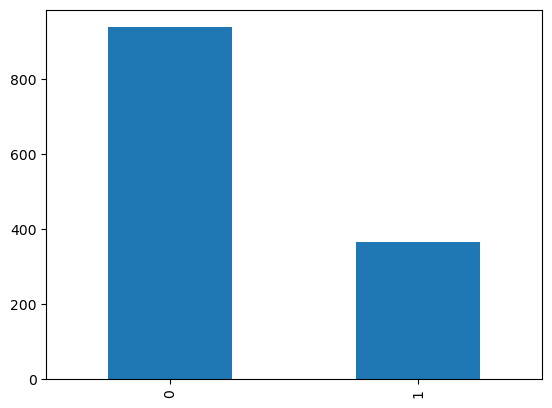

In [457]:
df['Ips'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

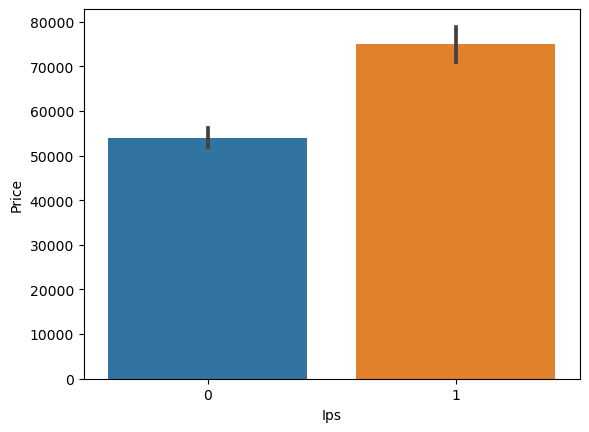

In [458]:
sns.barplot(x = df['Ips'], y = df['Price'])

#### This shows that ips panel laptop cost more than non ips panel

In [459]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [460]:
df['ScreenResolution'].str.split('x', n = 1 , expand = True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


#### In the given code snippet, df['ScreenResolution'].str.split('x', n=1, expand=True), we are working with a pandas DataFrame df, specifically accessing the column labeled 'ScreenResolution'. This operation involves splitting the values in the 'ScreenResolution' column into multiple columns using the delimiter 'x'.

#### Let's break down the individual components of the code:

#### df['ScreenResolution']: This part of the code accesses the 'ScreenResolution' column from the DataFrame df. It assumes that the 'ScreenResolution' column contains strings representing the resolution of the laptop screens in the format "width x height" (e.g., "1920x1080").

#### .str: This is a property of pandas Series that allows us to apply string methods to the elements in the Series. In this case, we are applying the split() method to split the strings.

#### .split('x', n=1, expand=True): This is the split() method being applied to each element in the 'ScreenResolution' column. It takes three parameters:

#### 'x': This is the delimiter that will be used to split the strings. In this case, we are using 'x' as the delimiter because the resolution strings are typically in the format "width x height".

#### n=1: This parameter specifies the maximum number of splits to perform. Here, we set it to 1, which means the split will happen at the first occurrence of 'x'. If there are additional 'x' characters in the string, they will not be split further. This helps in cases where there might be extra 'x' characters, such as "3840x2160x60Hz".

#### expand=True: This parameter is used to expand the split results into separate columns of the DataFrame. When set to True, the split values will be returned as a new DataFrame with multiple columns, one for each part of the split string. If set to False, the split values would be returned as a pandas Series.

#### After executing the code, the 'ScreenResolution' column will be transformed into multiple new columns, typically named '0' and '1', containing the width and height values of the screen resolutions, respectively. For example, if the original 'ScreenResolution' column contained the string "1920x1080", the resulting DataFrame would have two new columns with the values 1920 and 1080, respectively.

In [461]:
new = df['ScreenResolution'].str.split('x', n = 1 , expand = True)

In [462]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [463]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.12,0,0,Full HD 1920,1080
102,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Linux,2.20,34472.16,0,0,Full HD 1920,1080
815,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,99047.52,0,0,Full HD 1920,1080
354,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,2.40,74751.84,0,1,IPS Panel Full HD 1920,1080
1217,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,28717.92,0,0,1600,900


#### The Y_res is as we expect but the X_res has more information than we want

In [464]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

#### The code df['X_res'].str.replace(',', '').str.extract(r'(\d+)') is a series of pandas string operations applied to the 'X_res' column of the DataFrame df. It aims to extract numeric values from the strings in the 'X_res' column while handling any possible commas in the numbers.

#### Let's break down the code step by step:

#### df['X_res']: This part accesses the 'X_res' column from the DataFrame df. It assumes that the 'X_res' column contains strings with some numeric values, possibly with commas as thousands separators (e.g., "1,920" or "3,600").

#### .str.replace(',', ''): This is the first string operation applied to each element in the 'X_res' column. It uses the replace() method to remove commas (,) from the strings. For example, "1,920" would be transformed into "1920", and "3,600" into "3600".

#### .str.extract(r'(\d+)'): After removing commas, this is the second string operation applied to each element in the 'X_res' column. It uses the extract() method with a regular expression r'(\d+)' to extract numeric values from the strings.

#### \d+ in the regular expression matches one or more digits. So, the extract() method will capture all consecutive digits in the string as a group.

#### Since the regular expression contains parentheses (), the extract() method will return the captured group as a new pandas DataFrame with a single column.

#### The final output of this code will be a pandas DataFrame with a single column containing the extracted numeric values from the 'X_res' column, with any commas removed. For example, if the 'X_res' column originally contained the strings "1,920" and "3,600", the resulting DataFrame would have a single column with the values 1920 and 3600, respectively.

#### In summary, the code effectively removes commas from the numeric values in the 'X_res' column and then extracts those numeric values as a separate DataFrame, making it easier to work with numeric data in further analyses or computations.








In [465]:
df['X_res'] = df['X_res'].str.replace(',','').str.extract(r'(\d+\.?\d+)')

In [466]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
1019,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,118761.12,0,0,1920,1080
143,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,32074.56,0,0,1366,768
410,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia Quadro M1200,Windows 10,2.67,102564.00,0,0,1920,1080
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.13,139860.00,0,1,2560,1440
354,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,2.40,74751.84,0,1,1920,1080


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


#### As we can see that the data type of X_res and Y_res are object and i need to convert it to the integer

In [468]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [470]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

#### This shows that X_res and Y_res has higher correlation with price

#### Now we will make a new column called Ppi pixel per inches. As we have heard that higher pixel means  higher price for the laptop.

#### We will not use X_res and Y_res as they have multi coliranity. We can do it with formula
#### (df['X_res']**2 + df['Y_res']**2)**0.5/df['Inches']

In [471]:
(df['X_res']**2 + df['Y_res']**2)**0.5/df['Inches']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Length: 1303, dtype: float64

In [472]:
df['ppi'] = ((df['X_res']**2 + df['Y_res']**2)**0.5/df['Inches']).astype('float')

In [473]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

#### Now we can see that ppi has strong correlation with price. We won't use column X_res , Y_res and Inches for the prediction as we have ppi for all of   them

#### Now we will drop screen resolution column

In [474]:
df.drop(columns = ['ScreenResolution'], inplace = True)

In [475]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [476]:
df.drop(columns = ['X_res', 'Y_res','Inches'], inplace = True)

In [477]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


#### Now let us go with the cpu column

In [478]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

#### Let's use feature engineering to go deep into it. We will make 5 columns from the Cpu column

#### In the beginning we will extract first three words from the Cpu column

In [479]:
df['Cpu'].apply(lambda x :x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [482]:
df['Cpu_Name']= df['Cpu'].apply(lambda x :" ".join(x.split()[0:3]))

In [484]:
df['Cpu_Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu_Name, Length: 1303, dtype: object

#### Let us make function to find out other processor other than intel 

In [485]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [486]:
df['Cpu_brand'] = df['Cpu_Name'].apply(fetch_processor)

In [487]:
df['Cpu_brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu_brand, Length: 1303, dtype: object

In [488]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_ame,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,Intel Core i5


<AxesSubplot:>

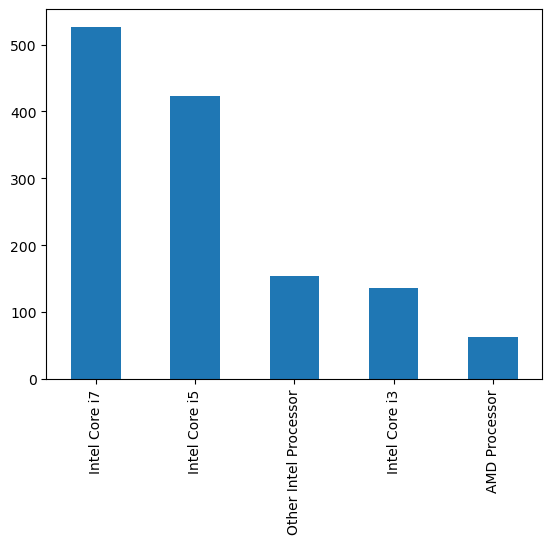

In [489]:
df['Cpu_brand'].value_counts().plot(kind= 'bar')

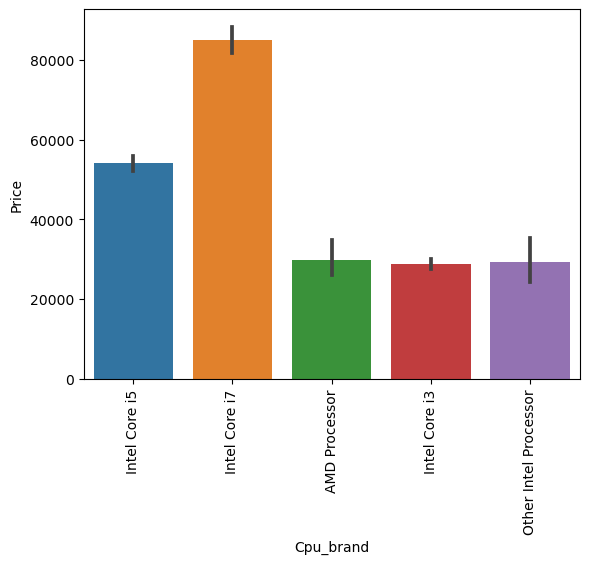

In [490]:
sns.barplot(x = df['Cpu_brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### This shows that price depends on the processor

In [494]:
df.drop(columns = ['Cpu_ame', 'Cpu'bb], inplace = True)

KeyError: "['Cpu'] not found in axis"

In [495]:
df.drop(columns = ['Cpu_ame'], inplace = True)

In [496]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

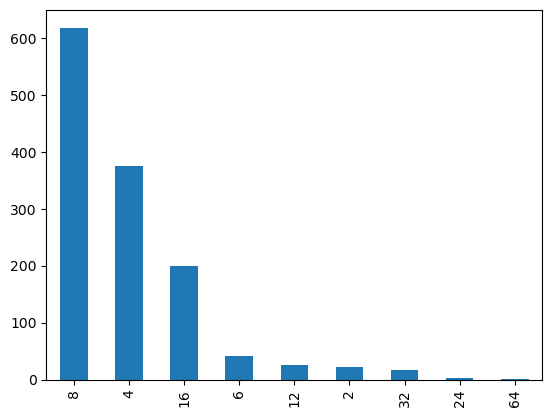

In [497]:
df['Ram'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

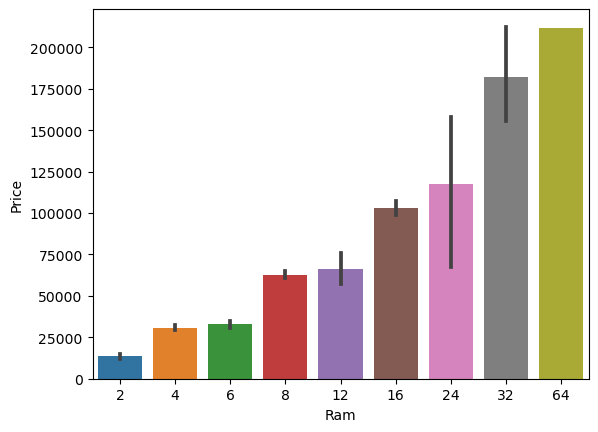

In [498]:
sns.barplot(x = df['Ram'], y = df['Price'])

#### Above graph shows that the linear relationship between Ran and Price

#### Now let's work with the memory column. It contains different information. We will extract the important one

In [499]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

#### Now we will make 4 columns from this. HDD, SDD, flash storage and hybrid

In [500]:
df['Memory']= df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory']= df['Memory'].str.replace('GB','')
df['Memory']= df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split("+",n = 1,expand= True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second']= new[1]
df['Layer1HDD'] = df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)

df['first'] = df['first'].str.replace(r'\D' , '')
df['second'].fillna("0", inplace = True)    
df['Layer2HDD'] = df['second'].apply(lambda x :1 if 'HDD'in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x :1 if 'SSD'in x else 0)       
df['Layer2Flash_Storage'] = df['second'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['Layer2Hybrid']=df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
                                                                
df['second'] = df['second'].str.replace(r'\D' , '')

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD'] = (df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash Storage'] = (df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage'])

df.drop(columns = ['first', 'second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD', 'Layer1Hybrid','Layer2Flash_Storage'
                ,'Layer2Hybrid','Layer1Flash_Storage'],inplace = True)
                      

C:\Users\karki\AppData\Local\Temp\ipykernel_12208\4145837304.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D' , '')
C:\Users\karki\AppData\Local\Temp\ipykernel_12208\4145837304.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D' , '')


In [502]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


#### Now let us drop the memory column

In [503]:
df.drop(columns = ['Memory'], inplace = True)

In [504]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,0,0
258,MSI,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.7200,0,0,127.335675,Intel Core i7,1000,512,0,0
255,Dell,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.41,50562.7200,0,0,165.632118,Intel Core i5,0,256,0,0
166,Acer,Notebook,4,Intel HD Graphics 505,Windows 10,2.10,19367.8128,0,0,100.454670,Other Intel Processor,1000,0,0,0
1288,Asus,Notebook,4,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,100.454670,Other Intel Processor,500,0,0,0


In [505]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid          -0.040147
Flash Storage   -0.040511
Name: Price, dtype: float64

#### See the correlation between the price and ssd> Strong correlation. But with hdd it has weak correlation

#### Since the hybrid and flash storage has no much impact on price so i want to drop these columns 

In [506]:
df.drop(columns = ['Hybrid', 'Flash Storage'], inplace = True)

In [507]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD
1244,HP,Notebook,4,Intel HD Graphics 520,Windows 7,1.54,58607.4672,0,0,157.350512,Intel Core i5,0,256


In [508]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

#### Now let us focus on Gpu column. Here are so  many categories. Since much informaiton is not given so i will extract brand name from the Gpu column.

In [509]:
df['Gpu'].apply(lambda x: x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [510]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [511]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [512]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

#### There is one laptop with ARM's gpu. Let us drop that row

In [513]:
df[df['Gpu_brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [514]:
df = df[df['Gpu_brand'] != 'ARM']

In [515]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

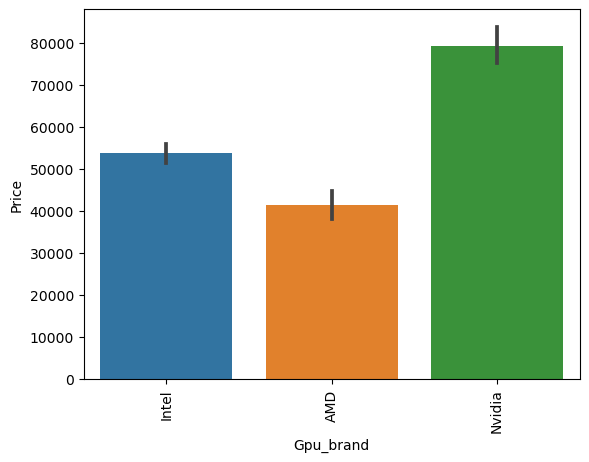

In [516]:
sns.barplot(x = df['Gpu_brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

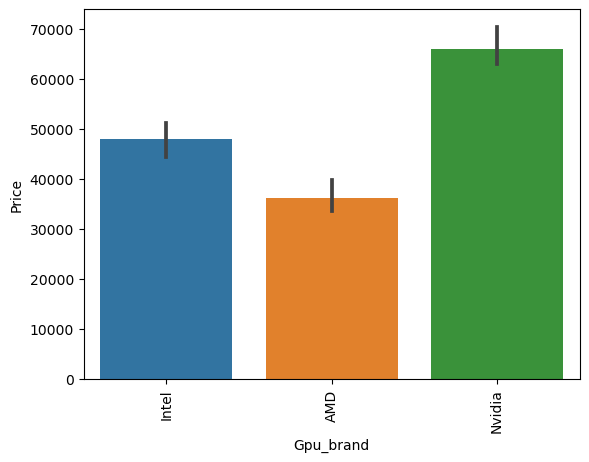

In [517]:
sns.barplot(x = df['Gpu_brand'], y = df['Price'], estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

#### This shows that price in influenced ny gpu brand


#### Let us drop the Gpu column

In [518]:
df.drop(columns = ['Gpu'], inplace = True)

C:\Users\karki\AppData\Local\Temp\ipykernel_12208\206878016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Gpu'], inplace = True)


In [519]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


#### Let's work with OpSys and Weight

In [520]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

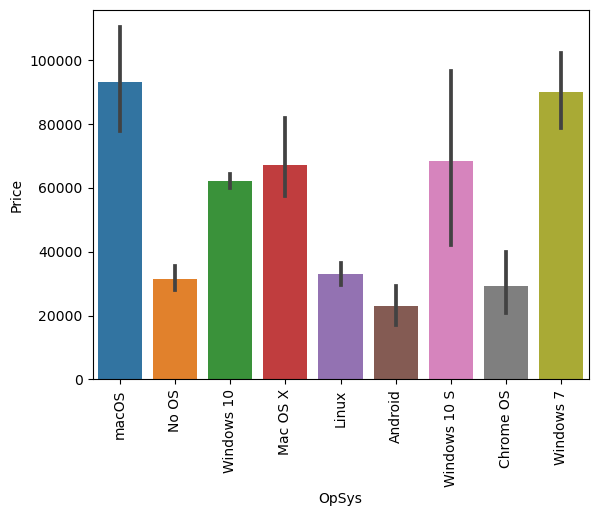

In [521]:
sns.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### Let us merge the operating system as window , os and others 

In [522]:
def cat_os(inp):
    if inp =='Windows 10'or inp == 'Windows 10 S' or inp == 'Window 7' :
        return 'Windows'
    elif inp == 'Mac OS X' or inp == 'macOS':
        return 'Mac'
    else:
        return "Others/NO/No OS/Linux"

In [523]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\karki\AppData\Local\Temp\ipykernel_12208\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [524]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


#### Now let us drop the OpSys column as it is not needed for us

In [525]:
df.drop(columns = ['OpSys'], inplace = True)

C:\Users\karki\AppData\Local\Temp\ipykernel_12208\28333434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['OpSys'], inplace = True)


In [526]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


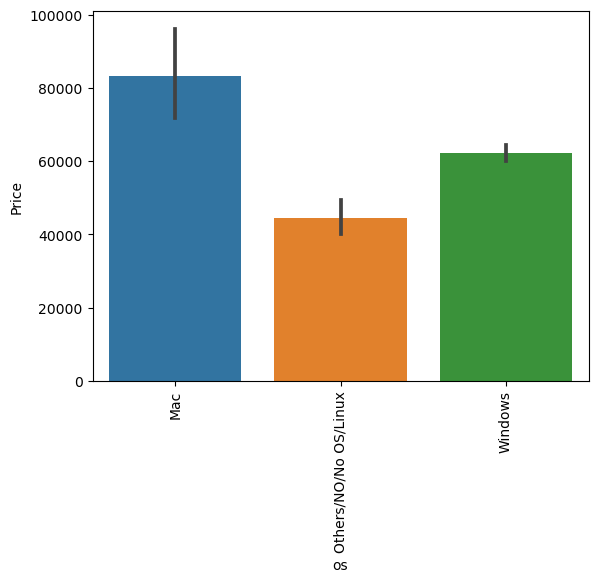

In [527]:
sns.barplot(x = df['os'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\karki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

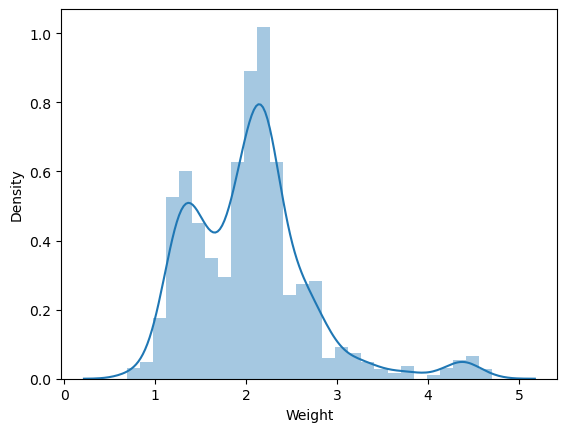

In [528]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

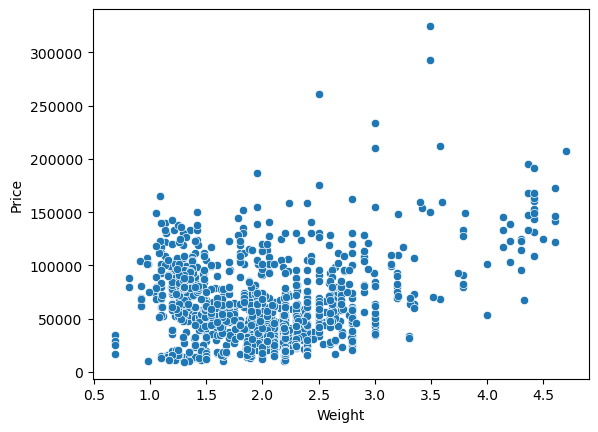

In [529]:
sns.scatterplot(x = df['Weight'],y = df['Price'])

In [530]:
backup = df.copy()

In [531]:
df.to_csv('Processed_data.csv',index = False)

In [532]:
df.corr()['Weight']

Ram            0.383362
Weight         1.000000
Price          0.209867
TouchScreen   -0.293004
Ips            0.018643
ppi           -0.321883
HDD            0.514147
SSD           -0.063818
Name: Weight, dtype: float64

In [533]:
df.corr()

,Ram,Weight,Price,TouchScreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


In [534]:
#### Let's plot the heatmap to see in details

<AxesSubplot:>

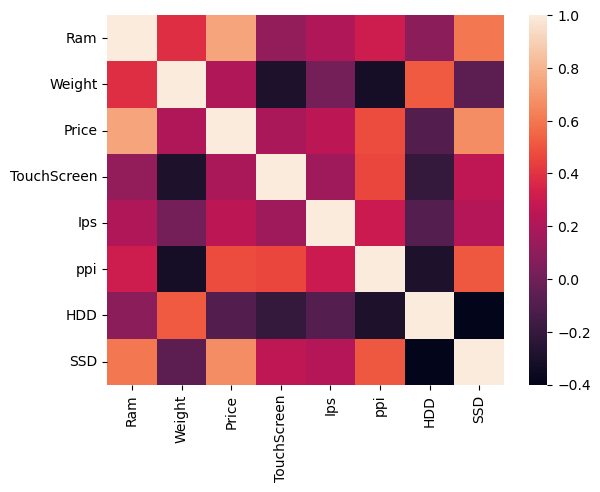

In [535]:
sns.heatmap(df.corr())

#### Since there is no any columns which have highest correlation with one another except price so we will use all of them

#### Since our target column price is skewed so may be it will create probelem to our machine learning algorithms

C:\Users\karki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

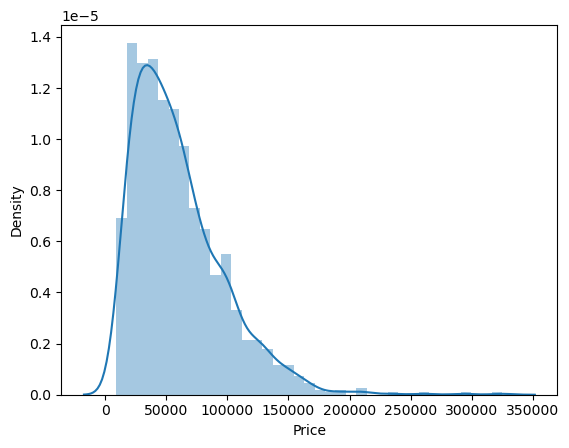

In [536]:
sns.distplot(df['Price'])

#### We can apply log transformation to it to make the price normally distributed.

C:\Users\karki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

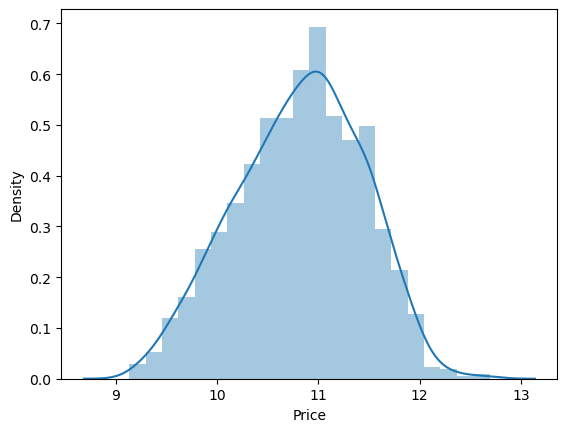

In [537]:
sns.distplot(np.log(df['Price']))

#### When you do log transformationm, during predction you have to use exponential to cancel it during prediction

In [538]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [539]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [540]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [541]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [542]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Others/NO/No OS/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/NO/No OS/Linux


#### Now we will use one hot encoding for the categorical columns

In [543]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [544]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [545]:
step1 = ColumnTransformer(transformers = [
('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
    

#### The code you provided is creating a ColumnTransformer object named step1. A ColumnTransformer is a powerful preprocessing tool in scikit-learn that allows you to apply different transformations to different subsets of columns in your dataset. This is particularly useful when you have a mix of numerical and categorical features and you want to preprocess them differently before feeding them into a machine learning model.

#### Let's break down the code step by step:

#### ColumnTransformer(transformers=[...], remainder='passthrough'):

#### ColumnTransformer: This is a class from scikit-learn that allows you to specify different transformations for different subsets of columns in your dataset.

#### transformers: This parameter takes a list of tuples, where each tuple defines a transformation to be applied to a subset of columns. In your code, you have one tuple in the list.

#### ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]): This is the tuple defining the transformation for a subset of columns.

#### 'col_tnf': This is a name given to this transformation. It can be any string and is used as an identifier for this transformation.

#### OneHotEncoder(sparse=False, drop='first'): This is the transformation to be applied. In this case, it is the OneHotEncoder from scikit-learn, which is used to convert categorical variables into a one-hot encoded representation. The sparse=False parameter means that the resulting one-hot encoded matrix will be a dense array (not a sparse matrix), and drop='first' means that the first category of each categorical feature will be dropped to avoid multicollinearity.

#### [0, 1, 7, 10, 11]: This is the list of column indices (integer positions) that will be transformed using the specified OneHotEncoder. In this example, columns at positions 0, 1, 7, 10, and 11 will be one-hot encoded, assuming the input data is a DataFrame or a 2D array.

#### remainder='passthrough': This parameter specifies how to handle the remaining columns in the dataset that are not explicitly transformed. 'passthrough' means that these columns will be kept as they are, without any transformation. In other words, they will be included in the final output without any preprocessing.

#### In summary, the step1 ColumnTransformer applies the OneHotEncoder transformation to the columns at positions 0, 1, 7, 10, and 11 of the input data (assuming the input data is a DataFrame or a 2D array). The rest of the columns will be kept unchanged in the final output. This can be a useful preprocessing step in machine learning pipelines when dealing with mixed data types and wanting to apply different transformations to different subsets of features.


In [546]:
step2 = LinearRegression()

In [547]:
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )

In [548]:
pipe.fit(X_train,y_train)

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [549]:
y_pred =pipe.predict(X_test)

In [550]:
print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))

r2_score 0.7930197230743772
mean_absolute_error 0.2102787916414403


# Ridge Regression

In [551]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = Ridge(alpha = 10)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.7936699326150534
mean_absolute_error 0.20974863466065607


# Linear Regression

In [552]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = LinearRegression()  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

r2_score: 0.7930197230743772
mean_absolute_error: 0.2102787916414403


C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Lasso Regresssion

In [553]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = Lasso(alpha = 0.001)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.7884123743059512
mean_absolute_error: 0.2122238939362398


# KNN

In [554]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = KNeighborsRegressor(n_neighbors = 3) 
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.7750546301772752
mean_absolute_error: 0.20485642143614924


# Decision Tree

In [555]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = DecisionTreeRegressor(max_depth = 8)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

r2_score: 0.7992299424468706
mean_absolute_error: 0.20047289963900855


C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# SVM

In [556]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = SVR(kernel = 'rbf',C = 10000, epsilon = 0.1) 
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.7693126996698256
mean_absolute_error: 0.2077389411618968


# Random Forest 

In [572]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = RandomForestRegressor(n_estimators =100,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features = 0.75,
                             max_depth = 15)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8559150706152507
mean_absolute_error: 0.17046410919366176


# ExtraTrees

In [558]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = ExtraTreesRegressor(n_estimators =100,
                             random_state = 3,
                             max_features = 0.75,
                             max_depth = 15)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8429295466480782
mean_absolute_error: 0.16825658809588667


# AdaBoost

In [559]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = AdaBoostRegressor(n_estimators = 15, learning_rate = 1.0 )  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

r2_score: 0.7953094751906693
mean_absolute_error: 0.22113426786461599


C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Gradient Boost

In [560]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = GradientBoostingRegressor(n_estimators = 500 , max_features = 0.5)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8715489299883413
mean_absolute_error: 0.1598932425922132


# XgBoost

In [561]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')
step2 = XGBRegressor(n_estimators = 45,max_depth = 5,learning_rate = 0.5)  
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

r2_score: 0.8602796030995096
mean_absolute_error: 0.16430529760871712


C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Voting Regressor

In [562]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [563]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,
        drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')

rf = RandomForestRegressor(n_estimators =350,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features = 0.75,
                             max_depth = 15) 
gbdt = GradientBoostingRegressor(n_estimators = 500 , max_features = 0.5)
xgb = XGBRegressor(n_estimators = 25 ,max_depth = 5,learning_rate = 0.3) 
et = ExtraTreesRegressor(n_estimators =100,
                             random_state = 3,
                             max_features = 0.75,
                             max_depth = 16)  
step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights = [5,1,1,1]) 
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8701499401280506
mean_absolute_error: 0.1619113639521221


# Stacking

In [570]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,
        drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough')

estimators = [ ('rf' ,RandomForestRegressor(n_estimators =350,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features = 0.75,
                             max_depth = 15)),
('gbdt' , GradientBoostingRegressor(n_estimators = 500 , max_features = 0.5)),
('xgb' , XGBRegressor(n_estimators = 25 ,max_depth = 5,learning_rate = 0.3))]

step2 = StackingRegressor(estimators = estimators,final_estimator = Ridge(alpha = 100))
pipe = Pipeline([('step1' ,step1),
                 ('step2', step2)] )
pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

C:\Users\karki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8695320417256862
mean_absolute_error: 0.1635628672782612


# Exporting the model

In [565]:
import pickle
pickle.dump(df,open('df.pkl','wb'))


In [566]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [574]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [569]:
df['Cpu_brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu_brand, Length: 1302, dtype: object